In [12]:
import pandas as pd
import numpy as np
import seaborn as sns

from datetime import datetime
from datetime import timedelta

In [13]:
# mav0
# mav0_working_from_470_850_frames - this is now mav_0

In [29]:
!ls

ImuParams.yaml	       mav0_home1
LeftCameraParams.yaml  mav0_virtana_office_working_sample_1
logs.txt	       mav0_working_from_100
mav0		       RightCameraParams.yaml
mav0_euroc	       Timestamp_Checks_Manipulation.ipynb


In [69]:
dir_name = './mav0_euroc'

In [70]:
imu_df = pd.read_csv(f'{dir_name}/imu0/data.csv')
cam_df = pd.read_csv(f'{dir_name}/cam0/data.csv')

In [71]:
imu_df.head(5)

,#timestamp [ns],w_RS_S_x [rad s^-1],w_RS_S_y [rad s^-1],w_RS_S_z [rad s^-1],a_RS_S_x [m s^-2],a_RS_S_y [m s^-2],a_RS_S_z [m s^-2]
0,1413393212225760512,0.094946,0.020246,0.058643,9.128357,0.106239,-2.606934
1,1413393212230760448,0.058643,0.035605,0.051662,9.422556,1.160454,-2.623279
2,1413393212235760384,-0.011170,0.027925,0.069813,9.398040,1.618097,-2.705001
3,1413393212240760576,-0.072606,0.033510,0.069813,9.496106,0.670121,-2.819412
4,1413393212245760512,-0.092153,0.036303,0.078889,8.989429,-0.130755,-2.713173


In [72]:
imu_df.shape

(22800, 7)

In [73]:
cam_df.head(5)

,#timestamp [ns],filename
0,1413393212255760384,1413393212255760384.png
1,1413393212305760512,1413393212305760512.png
2,1413393212355760384,1413393212355760384.png
3,1413393212405760512,1413393212405760512.png
4,1413393212455760384,1413393212455760384.png


In [74]:
cam_df.shape

(2280, 2)

### Checking Deltas - IMU

In [75]:
imu_df['#timestamp [ns]']

0        1413393212225760512
1        1413393212230760448
2        1413393212235760384
3        1413393212240760576
4        1413393212245760512
                ...         
22795    1413393326200760576
22796    1413393326205760512
22797    1413393326210760448
22798    1413393326215760384
22799    1413393326220760576
Name: #timestamp [ns], Length: 22800, dtype: int64

In [101]:
deltas = pd.to_datetime(imu_df['#timestamp [ns]']).diff() / np.timedelta64(1000000, 'ns')

In [102]:
deltas

0              NaN
1        4999936.0
2        4999936.0
3        5000192.0
4        4999936.0
           ...    
22795    5000192.0
22796    4999936.0
22797    4999936.0
22798    4999936.0
22799    5000192.0
Name: #timestamp [ns], Length: 22800, dtype: float64

In [103]:
delta_df = pd.DataFrame({'Timestamp': imu_df['#timestamp [ns]'], 'Delta':deltas})

In [104]:
delta_df.head(10)

,Timestamp,Delta
0,1413393212225760512,NaN
1,1413393212230760448,4999936.0
2,1413393212235760384,4999936.0
3,1413393212240760576,5000192.0
4,1413393212245760512,4999936.0
5,1413393212250760448,4999936.0
6,1413393212255760384,4999936.0
7,1413393212260760576,5000192.0
8,1413393212265760512,4999936.0
9,1413393212270760448,4999936.0


In [105]:
delta_df['Delta'].value_counts()

Delta
4999936.0    17099
5000192.0     5700
Name: count, dtype: int64

In [106]:
delta_df['Delta'].describe()

count    2.279900e+04
mean     5.000000e+06
std      1.108553e+02
min      4.999936e+06
25%      4.999936e+06
50%      4.999936e+06
75%      5.000064e+06
max      5.000192e+06
Name: Delta, dtype: float64

In [107]:
sns.set_theme(rc={'figure.figsize':(15,7)})

[Text(0.5, 0, 'Timestamp - UTC'), Text(0, 0.5, 'Delta (in milliseconds)')]

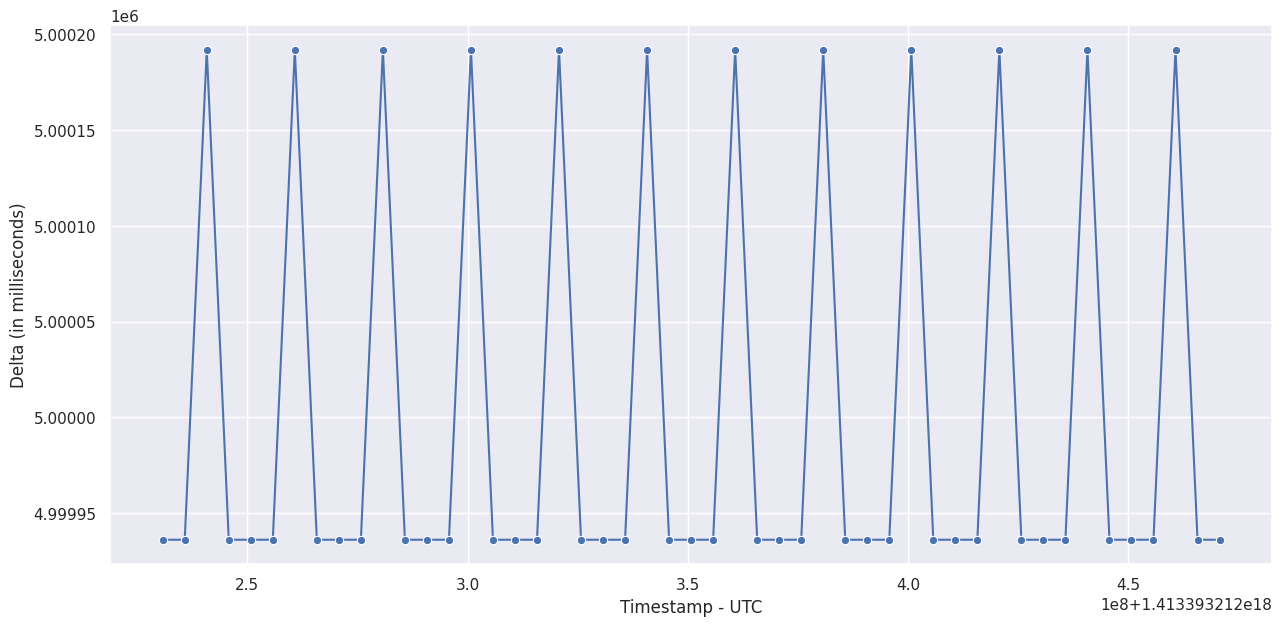

In [108]:
ax = sns.lineplot(data=delta_df[0:50], x="Timestamp", y="Delta", marker="o")
# ax.set(ylim=(7.0, 15.0))
ax.ticklabel_format(style='sci', axis='y', useOffset=False)
ax.set(xlabel='Timestamp - UTC', ylabel='Delta (in milliseconds)')

In [45]:
delta_df['Delta'].value_counts()

Delta
10.086912    33
9.938944     30
10.087936    30
10.084096    29
10.098944    29
             ..
10.502912     1
9.524992      1
9.340928      1
9.522176      1
9.761792      1
Name: count, Length: 2937, dtype: int64

### Checking Deltas - CAM

In [46]:
cam_df['#timestamp [ns]']

0      1725289777705492992
1      1725289777955492096
2      1725289778205496064
3      1725289778455496192
4      1725289778705496064
              ...         
561    1725289917966784000
562    1725289918216837888
563    1725289918466896896
564    1725289918716950784
565    1725289918967004928
Name: #timestamp [ns], Length: 566, dtype: int64

In [54]:
deltas = pd.to_datetime(cam_df['#timestamp [ns]']).diff() / np.timedelta64(1000000, 'ns')

In [55]:
delta_df = pd.DataFrame({'Timestamp': cam_df['#timestamp [ns]'], 'Delta':deltas})

In [56]:
delta_df.head(10)

,Timestamp,Delta
0,1725289777705492992,NaN
1,1725289777955492096,249999104.0
2,1725289778205496064,250003968.0
3,1725289778455496192,250000128.0
4,1725289778705496064,249999872.0
5,1725289778955496192,250000128.0
6,1725289779205496064,249999872.0
7,1725289779455496192,250000128.0
8,1725289779705496064,249999872.0
9,1725289779955496192,250000128.0


In [57]:
delta_df['Delta'].value_counts()

Delta
250000128.0    122
249999872.0    119
249999104.0     12
250050048.0     11
249945856.0      9
              ... 
250067968.0      1
249955840.0      1
249956096.0      1
249949184.0      1
249936896.0      1
Name: count, Length: 129, dtype: int64

In [58]:
delta_df['Delta'].describe()

count    5.650000e+02
mean     2.500204e+08
std      2.992554e+05
min      2.499279e+08
25%      2.499899e+08
50%      2.500001e+08
75%      2.500308e+08
max      2.550001e+08
Name: Delta, dtype: float64

[Text(0.5, 0, 'Timestamp - UTC'), Text(0, 0.5, 'Delta (in milliseconds)')]

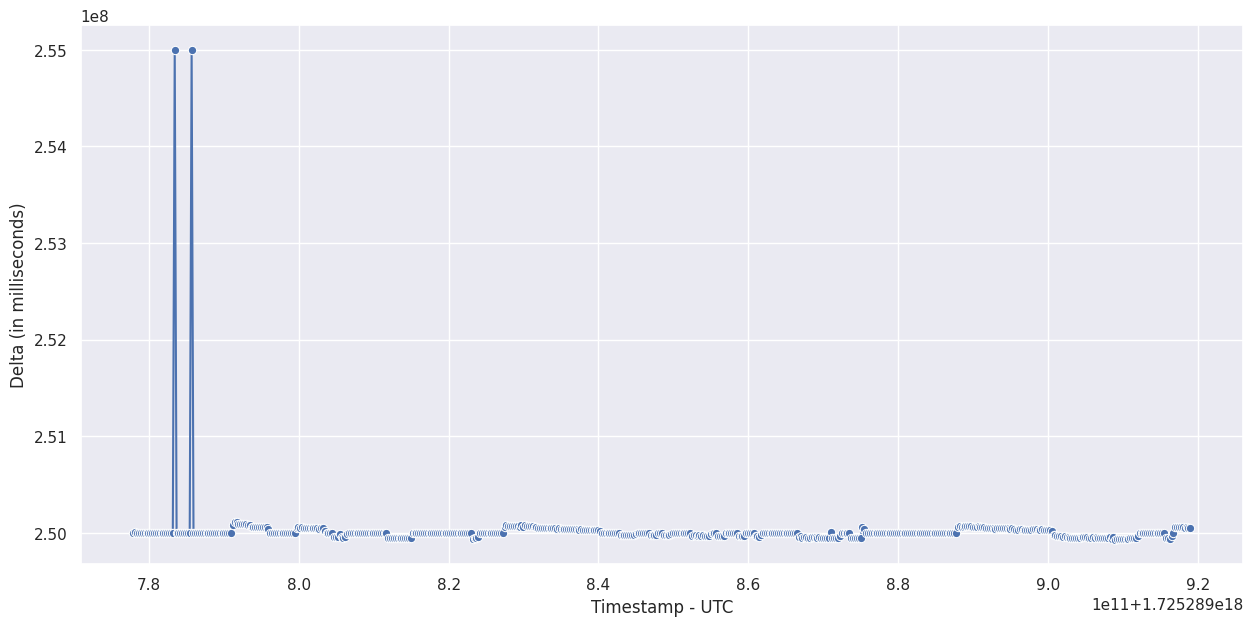

In [59]:
ax = sns.lineplot(data=delta_df, x="Timestamp", y="Delta", marker="o")
# ax.set(ylim=(4.999900, 5.000200))
ax.ticklabel_format(style='sci', axis='y', useOffset=False)
ax.set(xlabel='Timestamp - UTC', ylabel='Delta (in milliseconds)')

[Text(0.5, 0, 'Timestamp - UTC'), Text(0, 0.5, 'Delta (in milliseconds)')]

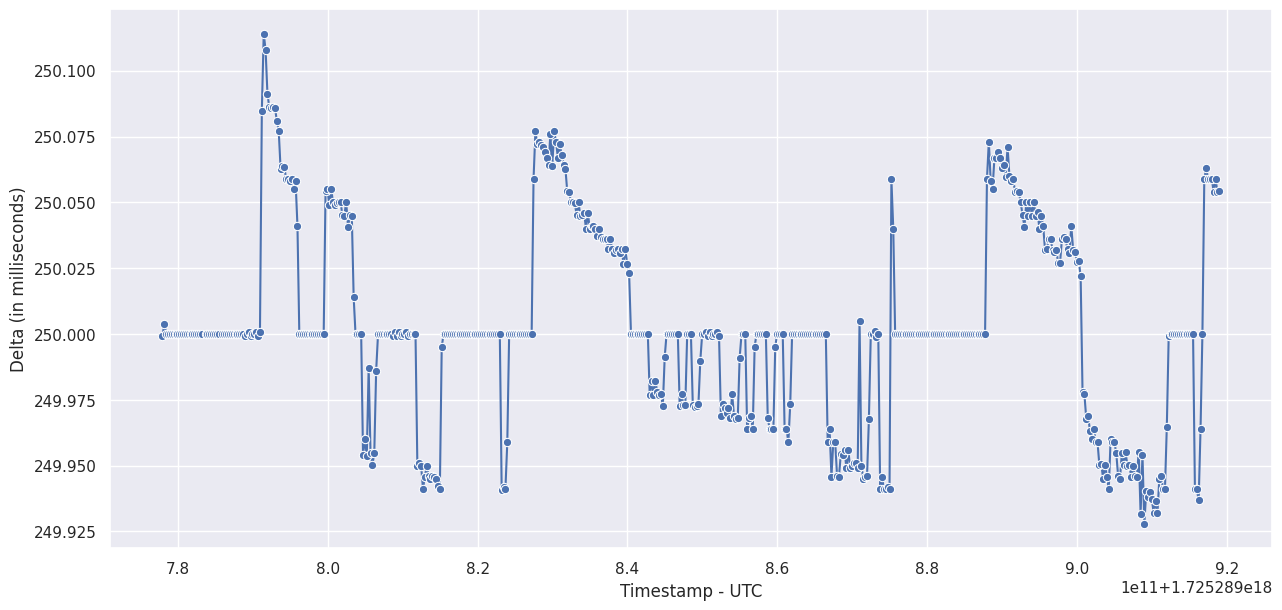

In [53]:
ax = sns.lineplot(data=delta_df[delta_df['Delta'] <= 251], x="Timestamp", y="Delta", marker="o")
# ax.set(ylim=(4.999900, 5.000200))
ax.ticklabel_format(style='sci', axis='y', useOffset=False)
ax.set(xlabel='Timestamp - UTC', ylabel='Delta (in milliseconds)')